# Handcrafted Feature Extraction: Part-2

### Welcome to the 3rd Lab of 42028: Deep Learning and CNN!

In this week's Lab/Tutorial session you will be implementing a feature extraction using HOG and train SVM classifier for image classification!

So lets get started!

## 2. Extraction of HOG features from fashion MNIST dataset and classification using SVM multiclass classification.##


### Step 1: Import required packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature # This pacakge is used for LBP feature extraction
from sklearn import svm # This pacakge is used for svm classification
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline
import cv2
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)

###  Mount the Google Drive to access the Fashion MNIST Dataset


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Step 2. Dataset preparation

* ** Utility/Helper function to load Dataset, unzip it and return images and labels.**  (Do not modify)

[**Reference**:  https://github.com/zalandoresearch/fashion-mnist](https:////github.com/zalandoresearch/fashion-mnist)

In [0]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [4]:
cd /content/gdrive/My Drive/42028-DL-CNN-2020/Week3-Lab3/data

/content/gdrive/.shortcut-targets-by-id/1-xylVH5ffrD-b2qttrA4xi83feaDJZ9b/42028-DL-CNN-2020/Week3-Lab3/data


* **  Use the utility function to load the dataset and split it into train and test.**



In [0]:
X_train, y_train = load_mnist('/content/gdrive/My Drive/42028-DL-CNN-2020/Week3-Lab3/data/fashion', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/42028-DL-CNN-2020/Week3-Lab3/data/fashion', kind='t10k')
# initialize the label names from Fashion MNIST github repository

labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [6]:
# The 28X28 images are flattened to feature vector of size 784
# There 60,000 training examples in the training dataset
np.shape(X_train)
np.shape(X_test)

(10000, 784)

* ** Reshaping the feature vector back into the 28X28 image**

In [7]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


** Visualization of Dataset**

top
trouser
sneaker
dress


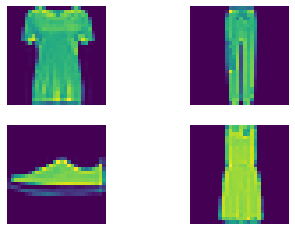

In [8]:
# view few images and print its corresponding label
img_index = 10
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
img_index = 1000
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,3)
ax2.axis('off')
img_index = 20000
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,4)
ax2.axis('off')
img_index = 30000
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

### Step 3: Histogram-of-Oriented Gradient (HOG) feature extraction

In [9]:

# initialize the data matrix and labels
print("Extracting features from training dataset...")
data_train = []
labels_train = []

# loop over the training images
for img_index in range(len(X_train)):
  # load the image, and extract HOG features
  image = (X_train[img_index])
  #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  H = feature.hog(image, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
 
  # update the data and labels
  data_train.append(H)
  labels_train.append(y_train[img_index])

print(np.shape(data_train))
print(np.shape(labels_train))

Extracting features from training dataset...
(60000, 36)
(60000,)


In [10]:
img_index

59999

### Step 4: Training Classifier using SVM multiclass classifier 

In [11]:
model = svm.SVC(kernel='rbf',C=100.0, random_state=42) # rbf Kernel
model.fit(data_train, labels_train)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [12]:
print("Train set Accuracy: {:.2f}".format(model.score(data_train,labels_train)))
# Expected Accuracy 0.77

Train set Accuracy: 0.95


### Step 5: Evaluation of trained model on test dataset

In [13]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")
predict_test = []
labels_test = []
data_test=[]
# loop over the training images
for img_ind in range(len(X_test)):
  # load the image, and extract HOG features
  img=X_test[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = model.predict(H.reshape(1, -1))[0]
  # update the data and labels
  predict_test.append(pred)
  data_test.append(H)
  
  labels_test.append(y_test[img_ind])
  
print(np.shape(predict_test))
print(np.shape(labels_test))

Extracting features from test dataset...
(10000,)
(10000,)


### Step 6: Experimental Results

In [14]:
# Test set Accuracy
accuracy = metrics.accuracy_score(y_test, predict_test)
print("Accuracy on test dataset:",accuracy)
# Expected test Accuracy 0.75

Accuracy on test dataset: 0.8081


[[791   1  39  33   8   2 111   0  15   0]
 [  5 955   2  27   1   1   6   0   3   0]
 [ 30   2 669  16 168   0 115   0   0   0]
 [ 49  20  51 795  46   1  33   0   3   2]
 [ 10   0 117  40 709   0 121   0   3   0]
 [  0   1   0   2   0 914   0  58   1  24]
 [151   3 114  35 173   0 511   0  13   0]
 [  0   0   0   0   0  57   0 878   0  65]
 [ 16   0   7   8   9   2  13   0 944   1]
 [  1   0   0   0   0  26   0  58   0 915]]


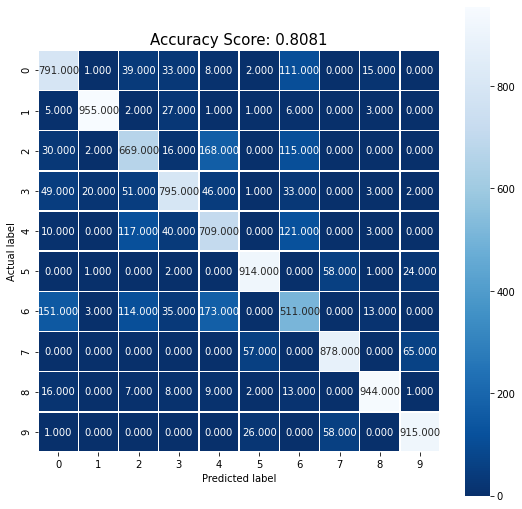

In [15]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test, predict_test)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

### Step 7: Visualization of results

In [0]:
images = []
orig_labels=[]
# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the clothing
  test_img = (X_test[i])
  H1 = feature.hog(test_img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = model.predict(H1.reshape(1, -1))[0]
  #prediction = model.predict(test_img.reshape(1, -1))
  label = labelNames[pred]
  orig_labels.append(labelNames[y_test[i]])
  color = (0, 255, 0)
  test_img = cv2.merge([test_img] * 3)
  test_img = cv2.resize(test_img, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(test_img, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(test_img)

In [17]:
orig_labels[1]

'coat'

coat
pullover
sneaker
coat


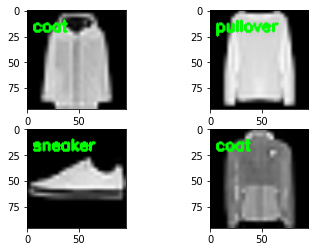

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_labels[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
print(orig_labels[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
print(orig_labels[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])
print(orig_labels[4])